### Check input files



In [41]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('../datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../datasets/train_data.csv
../datasets/firstDataset.csv


### Import train data and create DataFrame object

In [42]:
rawsData = pd.read_csv('../datasets/firstDataset.csv')
print("The files have been imported")


The files have been imported


In [ ]:
len(rawsData)

In [ ]:
rawsData.keys()

In [43]:
selectedData = rawsData[['Protocol', 'Fwd Pkt Len Max', 'Bwd Pkt Len Max', 'PSH Flag Cnt', 'ACK Flag Cnt', 'Fwd Seg Size Avg','Init Fwd Win Byts', 'Label']]
allDatasetToTest  = rawsData[['Protocol', 'Fwd Pkt Len Max', 'Bwd Pkt Len Max', 'PSH Flag Cnt', 'ACK Flag Cnt', 'Fwd Seg Size Avg','Init Fwd Win Byts', 'Label']]

In [44]:
withoutDuplicates = selectedData.drop_duplicates()

In [45]:
len(withoutDuplicates)

35521

In [ ]:
withoutDuplicates.keys()

### Find and display unique data
#### This function is used to search a Data Frame and then display unique values for each feature. 

In [ ]:
# def printUniqueValues(dataToCheck):
#     for column in dataToCheck:
#         uniqueValues = dataToCheck[column].unique()
#         uniqueCount = len(uniqueValues)
#         print(f"{column} = {uniqueValues} = {uniqueCount}")


# printUniqueValues(numeric_data)


### DataFrame information
#### The `info()` method provides us a basic information about featurs, like: feature's amout of data (how many values are NaN values) and the types of data (e.q int or float). It is very important information for future data processing beacuse, e.q: fetures which contains variables of type 'int' will be labeled differently than features which contains variables of type 'float'.

In [ ]:
withoutDuplicates.info()


### Preprocess training data.

Drop unnecessary features

In [ ]:
# def dropUnnecessaryFeatures(dataToTransform):
#     dataToTransform = dataToTransform.drop(['Timestamp'], axis=1)

#     dataToTransform = dataToTransform.drop(['Fwd Pkt Len Min'], axis=1)
#     dataToTransform = dataToTransform.drop(['Fwd Pkt Len Max'], axis=1)

#     dataToTransform = dataToTransform.drop(['Bwd Pkt Len Min'], axis=1)
#     dataToTransform = dataToTransform.drop(['Bwd Pkt Len Max'], axis=1)

#     dataToTransform = dataToTransform.drop(['Flow IAT Min'], axis=1)
#     dataToTransform = dataToTransform.drop(['Flow IAT Max'], axis=1)

#     dataToTransform = dataToTransform.drop(['Fwd IAT Max'], axis=1)
#     dataToTransform = dataToTransform.drop(['Fwd IAT Min'], axis=1)

#     dataToTransform = dataToTransform.drop(['Bwd IAT Max'], axis=1)
#     dataToTransform = dataToTransform.drop(['Bwd IAT Min'], axis=1)

#     dataToTransform = dataToTransform.drop(['Pkt Len Min'], axis=1)
#     dataToTransform = dataToTransform.drop(['Pkt Len Max'], axis=1)

#     dataToTransform = dataToTransform.drop(['Idle Max'], axis=1)
#     dataToTransform = dataToTransform.drop(['Idle Min'], axis=1)

#     dataToTransform = dataToTransform.drop(['Active Max'], axis=1)
#     dataToTransform = dataToTransform.drop(['Active Min'], axis=1)

#     # "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s"
#     return dataToTransform


# numeric_data = dropUnnecessaryFeatures(numeric_data)


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# smallerData['Label'] = LabelEncoder().fit_transform(smallerData['Label'])

#### Process labels

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)


def showAttackDistribution(data):
    normal = 'Benign'
    ftpAttack = 'FTP-BruteForce'
    sshAttack = 'SSH-Bruteforce'
    fig = go.Figure(data=[
        go.Bar(name=normal,
               y=data.value_counts().values[0:1],
               x=[normal],
               text=data.value_counts()[0:1],
               orientation='v',
               textposition='outside',),
        go.Bar(name=ftpAttack,
               y=data.value_counts().values[1:2],
               x=[ftpAttack],
               text=data.value_counts()[1:2],
               orientation='v',
               textposition='outside',),
        go.Bar(name=sshAttack,
               y=data.value_counts().values[2:],
               x=[sshAttack],
               text=data.value_counts()[2:],
               orientation='v',
               textposition='outside',)
    ])
    # Change the bar mode
    fig.update_layout(
        width=800,
        height=600,
        title=f'Labels Distribution',
        yaxis_title='Number of attacks',
        xaxis_title='Attack Name',)
    iplot(fig)


In [ ]:
showAttackDistribution(withoutDuplicates['Label'])


In [46]:
def shortData(data, featureName):
    shortedNormal = data[data[featureName] == "Benign"][:100]
    shortedFTP = data[data[featureName] == "FTP-BruteForce"]
    shortedSSH = data[data[featureName] == "SSH-Bruteforce"]
    return pd.concat([shortedNormal, shortedFTP, shortedSSH], axis=0)


In [47]:
toTrainModel = shortData(withoutDuplicates, 'Label')
showAttackDistribution(toTrainModel['Label'])


In [48]:

def makeOnlyAttackOrNot(dataToTransform):
    columnToTransform = ['Label']
    for colKey in columnToTransform:
        dataToTransform[colKey] = dataToTransform[colKey].map(
            lambda i: 0 if i == 'Benign' else 1)
        # dataToTransform[colKey] = LabelEncoder().fit_transform(dataToTransform[colKey])

    return dataToTransform


In [49]:
toTrainModel = makeOnlyAttackOrNot(toTrainModel)

In [50]:
allDatasetToTest = makeOnlyAttackOrNot(allDatasetToTest)

/tmp/ipykernel_8339/438714507.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Heatmap
#### Heatmap provide us information on how much the individual features are interpedent. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(abs(toTrainModel.corr()), annot=True,
            linewidths=0.5, fmt='.2f', ax=ax)


Save label

In [51]:
toTrainModel = toTrainModel.replace(np.nan, 0)
toTrainModel = toTrainModel.replace(np.inf, 0)

allDatasetToTest = allDatasetToTest.replace(np.nan, 0)
allDatasetToTest = allDatasetToTest.replace(np.inf, 0)

In [52]:
labels = toTrainModel['Label']
toTrainModel = toTrainModel.drop(['Label'], axis=1)

In [53]:
labelsToTest = allDatasetToTest['Label']
allDatasetToTest = allDatasetToTest.drop(['Label'], axis=1)

In [ ]:
# toTrainModel = toTrainModel.drop(['Fwd Seg Size Min'], axis=1)

In [ ]:
print('Is any Nan:', np.any(np.isnan(toTrainModel)))
print('Is all finite:', np.all(np.isfinite(toTrainModel)))


In [54]:
from sklearn.preprocessing import StandardScaler


def scale(dataToTransform, columntoTransform):

    ss_dict = {col: StandardScaler() for col in columntoTransform}

    for colKey in columntoTransform:
        dataToTransform[colKey] = ss_dict[colKey].fit_transform(
            np.array(dataToTransform[colKey]).reshape(-1, 1))

    return dataToTransform


Scale numeric values

In [55]:
numericColumntoTransform = toTrainModel.keys()
toTrainModel = scale(toTrainModel, numericColumntoTransform)

In [56]:
numericColumntoTransform = allDatasetToTest.keys()
allDatasetToTest = scale(allDatasetToTest, numericColumntoTransform)

In [ ]:
# def lowerTypes(dataToTransform, columnToFloat):
#     for colKey in columnToFloat:
#         dataToTransform[colKey] = dataToTransform[colKey].astype('float32')
#     return dataToTransform

In [ ]:
# numeric_data = lowerTypes(numeric_data, numericColumntoTransform)

#### After preprocess

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    toTrainModel, labels, test_size=0.33, random_state=32)

In [58]:
X_trainTest, X_testTest, y_trainTest, y_testTest = train_test_split(
    allDatasetToTest, labelsToTest, test_size=0.33, random_state=32)

In [59]:
isRFC = True
isMLPC = False
isSequential = False

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense

def model():
    if isRFC:
        model = RandomForestClassifier(n_estimators = 20, max_depth=3, min_samples_leaf=10)
    elif isMLPC:
        model = MLPClassifier(random_state=32)
    else:
        model = Sequential([
            Dense(256, activation='softplus', kernel_initializer='glorot_uniform',
                input_dim=X_train.shape[1]),
            Dense(128, activation='softplus', kernel_initializer='glorot_uniform'),
            Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid')
        ])

        model.compile(loss='binary_crossentropy',
                        optimizer='Adam')

    return model

In [61]:
model = model()

In [62]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=20)

In [63]:
from sklearn.metrics import roc_auc_score, accuracy_score

X_train_preds = model.predict(X_train)
X_test_preds = model.predict(X_test)

if isSequential:
    print('Train auc:', roc_auc_score(y_train, X_train_preds))
    print('Test auc:', roc_auc_score(y_test, X_test_preds))
else:
    print('Train accuracy: ', accuracy_score(y_train, X_train_preds))
    print('Test accuracy: ', accuracy_score(y_test, X_test_preds))


Train accuracy:  0.9217391304347826
Test accuracy:  0.9122807017543859


In [64]:
X_trainTest_preds = model.predict(X_trainTest)
X_testTest_preds = model.predict(X_testTest)

if isSequential:
    print('Train auc:', roc_auc_score(y_trainTest, X_trainTest_preds))
    print('Test auc:', roc_auc_score(y_testTest, X_testTest_preds))
else:
    print('Train accuracy: ', accuracy_score(y_trainTest, X_trainTest_preds))
    print('Test accuracy: ', accuracy_score(y_testTest, X_testTest_preds))

Train accuracy:  0.5715249556967881
Test accuracy:  0.5710689824581684


In [ ]:
toTrainModel.to_csv('test.csv', index=False)
print("Ready")


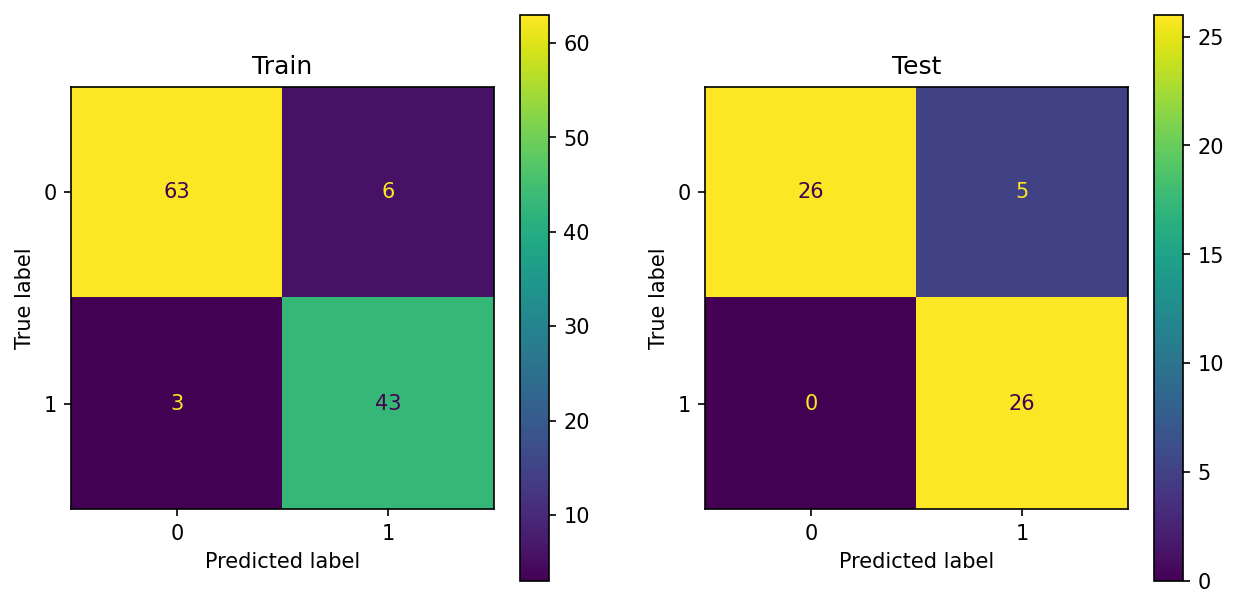

In [65]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Your code here
cmTrain = confusion_matrix(y_train, X_train_preds)
X_train_disp = ConfusionMatrixDisplay(confusion_matrix=cmTrain)

cmTest = confusion_matrix(y_test, X_test_preds)
X_test_disp = ConfusionMatrixDisplay(confusion_matrix=cmTest)
#End

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=150)

X_train_disp.plot(ax=ax[0])
ax[0].set_title("Train")

X_test_disp.plot(ax=ax[1])
ax[1].set_title("Test")
plt.show()